In [44]:
import os
import tensorflow as tf
import tensorflow.contrib.slim.nets as nets
import hiddenlayer as hl
import hiddenlayer.transforms as ht

In [21]:
# import os
# import time
# import random
# import numpy as np
# import torch
# import torchvision.models
# import torch.nn as nn
# from torchvision import datasets, transforms
# import hiddenlayer as hl  # Allows the creation of the model graphic

In [38]:
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.applications.vgg16 import VGG16
# import tensorflow.keras.backend as K
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.callbacks import Callback
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import confusion_matrix, accuracy_score
# # import cv2
# import itertools
# from matplotlib import pyplot as plt

In [45]:
# Hide GPUs. Not needed for this demo.
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [39]:
# # Create output directory in project root
# ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# OUTPUT_DIR = os.path.join(ROOT_DIR, "demo_output")
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes


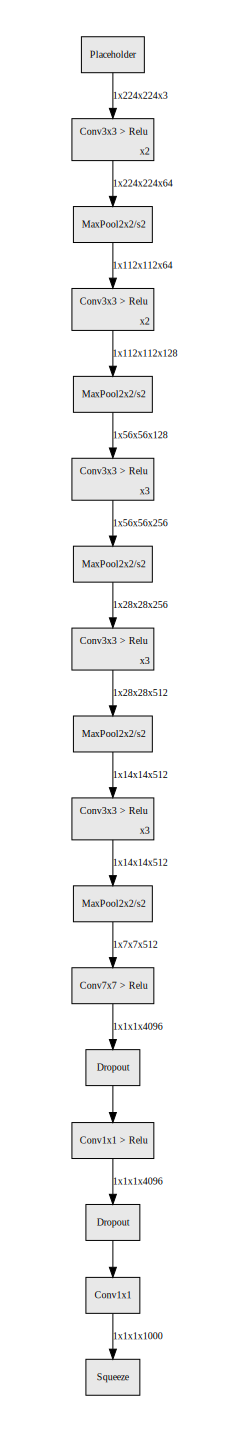

In [46]:
with tf.Session() as sess:
    with tf.Graph().as_default() as tf_graph:
        # Setup input placeholder
        inputs = tf.placeholder(tf.float32, shape=(1, 224, 224, 3))
        # Build model
        predictions, _ = nets.vgg.vgg_16(inputs)
        # Build HiddenLayer graph
        hl_graph = hl.build_graph(tf_graph)

# Display graph
# Jupyter Notebook renders it automatically
hl_graph

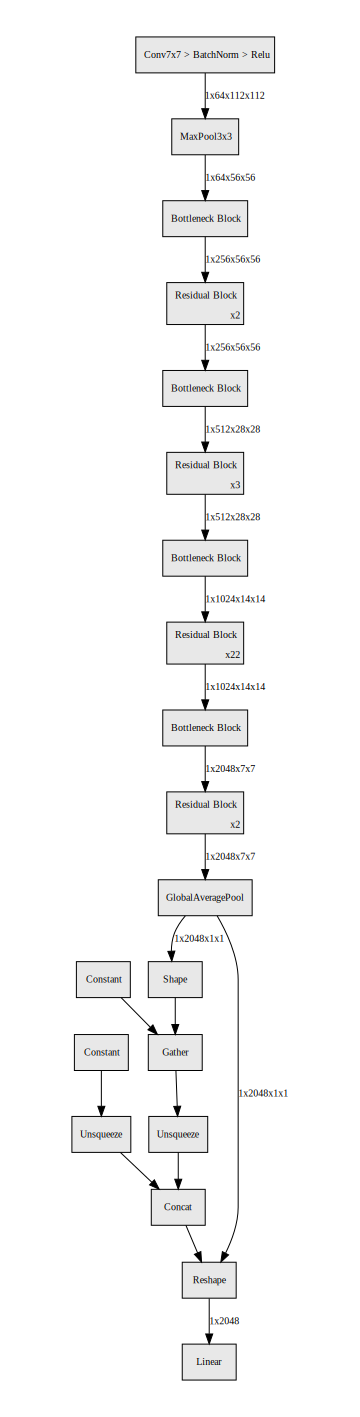

In [47]:
# Resnet101
model = torchvision.models.resnet101()

# Rather than using the default transforms, build custom ones to group
# nodes of residual and bottleneck blocks.
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Relu", "ConvBnRelu"),
    # Fold Conv, BN layers together
    hl.transforms.Fold("Conv > BatchNorm", "ConvBn"),
    # Fold bottleneck blocks
    hl.transforms.Fold("""
        ((ConvBnRelu > ConvBnRelu > ConvBn) | ConvBn) > Add > Relu
        """, "BottleneckBlock", "Bottleneck Block"),
    # Fold residual blocks
    hl.transforms.Fold("""ConvBnRelu > ConvBnRelu > ConvBn > Add > Relu""",
                       "ResBlock", "Residual Block"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

# Display graph using the transforms above
hl.build_graph(model, torch.zeros([1, 3, 224, 224]), transforms=transforms)



In [42]:
# Set the learning phase to training
K.set_learning_phase(1)

In [43]:
# Visual check of the "before" model architecture using HiddenLayer
hl.build_graph(K.get_session().graph)

Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes


KeyboardInterrupt: 

In [29]:
# AlexNet
model = torchvision.models.alexnet()

# Build HiddenLayer graph
hl_graph = hl.build_graph(model, torch.zeros(torch.is_tensor))

# Use a different color theme
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

hl_graph.save(path="graph_test" , format="jpg")

TypeError: zeros(): argument 'size' (position 1) must be tuple of ints, not function